In [ ]:
import pandas as pd
import numpy as np

#Link Dataset
https://docs.google.com/spreadsheets/d/1H7NMWyTFyVsBeZwQBbYYbTdAn4O-FW5z/edit?usp=sharing&ouid=107843281348817508332&rtpof=true&sd=true

In [ ]:
path = '/content/BreadBasket_DMS.xlsx'
df = pd.read_excel(path, sheet_name='BreadBasket_DMS')

### Data Exploration

In [ ]:
df.shape

(21293, 4)

In [ ]:
df.head(10)

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1.0,Bread
1,2016-10-30,10:05:34,2.0,Scandinavian
2,2016-10-30,10:05:34,2.0,Scandinavian
3,2016-10-30,10:07:57,3.0,Hot chocolate
4,2016-10-30,10:07:57,3.0,Jam
5,2016-10-30,10:07:57,3.0,Cookies
6,2016-10-30,10:08:41,4.0,Muffin
7,2016-10-30,10:13:03,5.0,Coffee
8,2016-10-30,10:13:03,5.0,Pastry
9,2016-10-30,10:13:03,5.0,Bread


In [ ]:
df.isnull().sum()

Date           0
Time           0
Transaction    0
Item           0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         21293 non-null  datetime64[ns]
 1   Time         21293 non-null  object        
 2   Transaction  21293 non-null  float64       
 3   Item         21293 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 665.5+ KB


In [ ]:
df['Year'] = df.Date.apply(lambda x : str(x).split('-')[0])
df['Month'] = df.Date.apply(lambda x : str(x).split('-')[1])
df['Day'] = df.Date.apply(lambda x : str(x).split('-')[-1])
df['Day'] = df['Day'].apply(lambda x : x.split(' ')[0])

In [ ]:
pd.options.display.max_columns = 100
df.head()

,Date,Time,Transaction,Item,Year,Month,Day
0,2016-10-30,09:58:11,1.0,Bread,2016,10,30
1,2016-10-30,10:05:34,2.0,Scandinavian,2016,10,30
2,2016-10-30,10:05:34,2.0,Scandinavian,2016,10,30
3,2016-10-30,10:07:57,3.0,Hot chocolate,2016,10,30
4,2016-10-30,10:07:57,3.0,Jam,2016,10,30


In [ ]:
df.head()

,Date,Time,Transaction,Item,Year,Month,Day
0,2016-10-30,09:58:11,1.0,Bread,2016,10,30
1,2016-10-30,10:05:34,2.0,Scandinavian,2016,10,30
2,2016-10-30,10:05:34,2.0,Scandinavian,2016,10,30
3,2016-10-30,10:07:57,3.0,Hot chocolate,2016,10,30
4,2016-10-30,10:07:57,3.0,Jam,2016,10,30


In [ ]:
df.duplicated().sum()

1653

In [ ]:
df.groupby(['Year','Month']).count()

Date  Time  Transaction  Item   Day
Year Month                                     
2016 10      385   385          385   385   385
     11     4607  4607         4607  4607  4607
     12     3569  3569         3569  3569  3569
2017 01     3509  3509         3509  3509  3509
     02     3991  3991         3991  3991  3991
     03     4041  4041         4041  4041  4041
     04     1191  1191         1191  1191  1191

In [ ]:
df.Item = df.Item.apply(lambda x : x.lower())

In [ ]:
df.head()

,Date,Time,Transaction,Item,Year,Month,Day
0,2016-10-30,09:58:11,1.0,bread,2016,10,30
1,2016-10-30,10:05:34,2.0,scandinavian,2016,10,30
2,2016-10-30,10:05:34,2.0,scandinavian,2016,10,30
3,2016-10-30,10:07:57,3.0,hot chocolate,2016,10,30
4,2016-10-30,10:07:57,3.0,jam,2016,10,30


In [ ]:
df.Item.unique()

array(['bread', 'scandinavian', 'hot chocolate', 'jam', 'cookies',
       'muffin', 'coffee', 'pastry', 'medialuna', 'tea', 'none',
       'tartine', 'basket', 'mineral water', 'farm house', 'fudge',
       'juice', "ella's kitchen pouches", 'victorian sponge', 'frittata',
       'hearty & seasonal', 'soup', 'pick and mix bowls', 'smoothies',
       'cake', 'mighty protein', 'chicken sand', 'coke',
       'my-5 fruit shoot', 'focaccia', 'sandwich', 'alfajores', 'eggs',
       'brownie', 'dulce de leche', 'honey', 'the bart', 'granola',
       'fairy doors', 'empanadas', 'keeping it local', 'art tray',
       'bowl nic pitt', 'bread pudding', 'adjustment', 'truffles',
       'chimichurri oil', 'bacon', 'spread', 'kids biscuit', 'siblings',
       'caramel bites', 'jammie dodgers', 'tiffin', 'olum & polenta',
       'polenta', 'the nomad', 'hack the stack', 'bakewell',
       'lemon and coconut', 'toast', 'scone', 'crepes', 'vegan mincepie',
       'bare popcorn', 'muesli', 'crisps', 'pi

In [ ]:
df = df[df.Item!='none']

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df.Transaction.nunique()

9465

### Data Visualization

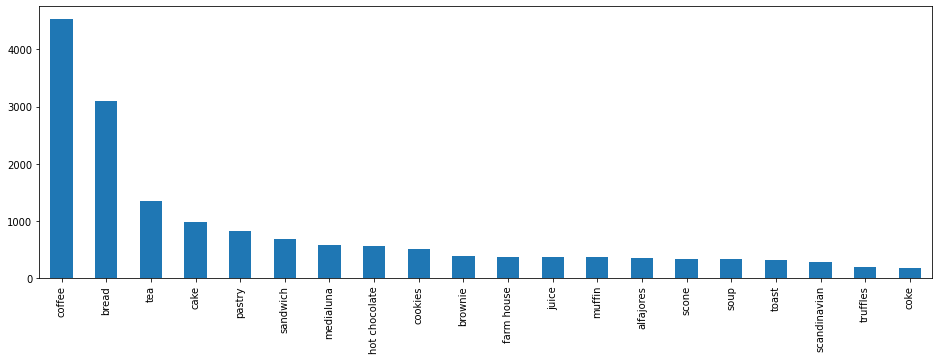

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))
df.Item.value_counts()[:20].plot(kind='bar')
plt.show()

### Transactional Encoder

In [ ]:
df[df.Transaction==3.0]['Item'].values

array(['hot chocolate', 'jam', 'cookies'], dtype=object)

In [ ]:
transactions = []
for i in df.Transaction.unique():
  temp = df[df.Transaction==i]['Item'].values
  transactions.append(temp)

In [ ]:
transactions = [list(df[df.Transaction==i]['Item'].values) for i in df.Transaction.unique()]

# transactions = []
# for i in df.Transaction.unique():
#   temp = df[df.Transaction==i]['Item'].values
#   transactions.append(temp)

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
tr = te.fit_transform(transactions)
tr = pd.DataFrame(tr, columns=te.columns_)
tr.head()

,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,bread,bread pudding,brioche and salami,brownie,cake,caramel bites,cherry me dried fruit,chicken sand,chicken stew,chimichurri oil,chocolates,christmas common,coffee,coffee granules,coke,cookies,crepes,crisps,drinking chocolate spoons,duck egg,dulce de leche,eggs,ella's kitchen pouches,empanadas,extra salami or feta,fairy doors,farm house,focaccia,frittata,fudge,gift voucher,gingerbread syrup,granola,hack the stack,half slice monster,hearty & seasonal,honey,hot chocolate,jam,jammie dodgers,juice,keeping it local,kids biscuit,lemon and coconut,medialuna,mighty protein,mineral water,mortimer,muesli,muffin,my-5 fruit shoot,nomad bag,olum & polenta,panatone,pastry,pick and mix bowls,pintxos,polenta,postcard,raspberry shortbread sandwich,raw bars,salad,sandwich,scandinavian,scone,siblings,smoothies,soup,spanish brunch,spread,tacos/fajita,tartine,tea,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

item_support = apriori(tr, min_support=0.025, use_colnames=True).sort_values('support', ascending=False)
item_support.head()

,support,itemsets
4,0.478394,(coffee)
1,0.327205,(bread)
16,0.142631,(tea)
3,0.103856,(cake)
18,0.090016,"(coffee, bread)"


In [ ]:
from mlxtend.frequent_patterns import apriori, association_rules

item_support2 = apriori(tr, min_support=0.0125, use_colnames=True).sort_values('support', ascending=False)
item_support2.head()

,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
24,0.142631,(tea)
4,0.103856,(cake)
30,0.090016,"(coffee, bread)"


### Perhitungan Metrics MBA

In [ ]:
association_rules(item_support, min_threshold=.2).sort_values('lift', ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
1,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
2,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
3,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
4,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
5,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
6,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305
7,(tea),(coffee),0.142631,0.478394,0.049868,0.349630,0.730840,-0.018366,0.802014
8,(bread),(coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561


In [ ]:
df_result = association_rules(item_support2, metric="lift", min_threshold=.5).sort_values('lift', ascending=False).reset_index(drop=True)

In [ ]:
df_result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(tea),(cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372
1,(cake),(tea),0.103856,0.142631,0.023772,0.228891,1.604781,0.008959,1.111865
2,(coffee),(toast),0.478394,0.033597,0.023666,0.049470,1.472431,0.007593,1.016699
3,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582
4,(tea),(sandwich),0.142631,0.071844,0.014369,0.100741,1.402222,0.004122,1.032134
5,(sandwich),(tea),0.071844,0.142631,0.014369,0.200000,1.402222,0.004122,1.071712
6,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
7,(coffee),(medialuna),0.478394,0.061807,0.035182,0.073542,1.189878,0.005614,1.012667
8,(coffee),(pastry),0.478394,0.086107,0.047544,0.099382,1.154168,0.006351,1.014740
9,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682


## Hasil Percobaan
```item_support = apriori(tr, min_support=0.0125, use_colnames=True).sort_values('support', ascending=False)```

Kami menurunkan min_support menjadi 0.0125 dengan tujuan agar menghasilkan kombinasi item yang lebih banyak agar dapat memberikan referensi yang lebih detail mengenai hubungan antar item berdasarkan dataset yang ada. Selain itu kami juga menambahkan parameter tuning pada association rule yaitu metric yang berdasarkan 'lift': <br>
```df_result = association_rules(item_support, metric="lift", min_threshold=.5).sort_values('lift', ascending=False).reset_index(drop=True)```

pemilihan metric ini karena kami ingin mengukur seberapa kuat hubungan antara dua item dalam transaksi tersebut. Pemilihan min_threshold sebesar 0.5 berfungsi sebagai batasan minimal suatu nilai lift dari kombinasi item dianggap valid. Tujuan pemilihan itu, berdasar beberapa eksperimen yang kami lakukan, nilai tersebut tidak terlalu rendah, dan tidak terlalu tinggi, menghasilkan beberapa kombinasi data yang cukup banyak yaitu kisaran 47 data yang tergolong relevan.